In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes_data_upload.csv')

## Data Exploration

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df['Gender'] = df['Gender'].apply(str)

In [7]:
df['class'].value_counts(), df['Gender'].value_counts()

(Positive    320
 Negative    200
 Name: class, dtype: int64,
 Male      328
 Female    192
 Name: Gender, dtype: int64)

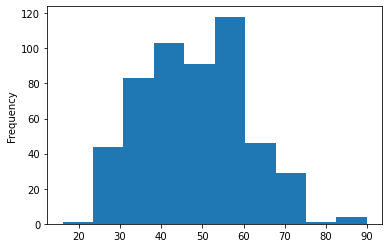

In [8]:
df['Age'].plot.hist()
plt.show()

In [9]:
 df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Polyuria'] = df['Polyuria'].map({'Yes': 1, 'No': 0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes': 1, 'No': 0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes': 1, 'No': 0})
df['weakness'] = df['weakness'].map({'Yes': 1, 'No': 0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes': 1, 'No': 0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes': 1, 'No': 0})
df['visual blurring'] = df['visual blurring'].map({'Yes': 1, 'No': 0})
df['Itching'] = df['Itching'].map({'Yes': 1, 'No': 0})
df['Irritability'] = df['Irritability'].map({'Yes': 1, 'No': 0})
df['delayed healing'] = df['delayed healing'].map({'Yes': 1, 'No': 0})
df['partial paresis'] = df['partial paresis'].map({'Yes': 1, 'No': 0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes': 1, 'No': 0})
df['Alopecia'] = df['Alopecia'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

## Model Building

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis='columns')
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [13]:
#Using GridSearchCV to find the best algorithm for this problem

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB

In [14]:
# Creating a function to calculate best model for this problem

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'bernoullinb': {
            'model' : BernoulliNB(),
            'parameters': {
                'alpha' : [0,1.0]
            }
        }
    }

    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

#find_best_model(X_train, y_train)

In [15]:
find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.953846
1,random_forest,{'n_estimators': 10},0.989744
2,bernoullinb,{'alpha': 1.0},0.910256


In [16]:
# Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 97.0%


In [17]:
# Creating Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=69)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

## Model Evaluation 

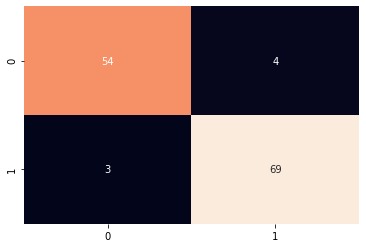

In [18]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [19]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.95      0.96      0.95        72

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.95       130
weighted avg       0.95      0.95      0.95       130



In [20]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [21]:
feature_importances

,importance
Polydipsia,0.226520
Polyuria,0.186996
Gender,0.105599
Age,0.090247
partial paresis,0.052769
sudden weight loss,0.049667
Alopecia,0.044813
Irritability,0.040498
Polyphagia,0.037707
Itching,0.030581
